<a href="https://colab.research.google.com/github/likeshd/ocr_work/blob/main/preprocessing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.10
# !pip install passporteye
!pip install easyocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (26.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
!pip install deskew

In [ ]:
!pip install paddleocr
!pip install paddlepaddle
!pip install ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=85b3a32e140a1b573f818111a2f770a4870c6306939ac08a5378f018604ac41d
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentation

In [ ]:
import easyocr
import numpy as np
from PIL import Image
import re
from typing import Dict, Optional

In [ ]:
import cv2
from deskew import determine_skew

In [ ]:
from paddleocr import PaddleOCR
import ftfy

In [ ]:
# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:08<00:00, 441.25it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:41<00:00, 240.62it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:15<00:00, 138.69it/s]


[2024/12/26 07:57:20] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [ ]:
# Load the image file path
image_path = '/content/FahadIqbal.jpg'


In [ ]:
import cv2
import numpy as np
from PIL import Image
import tempfile
import os

class ImagePreprocessor:
    def __init__(self, image_path):
        """
        Initialize the ImagePreprocessor with the path to the image.

        Parameters:
            image_path (str): Path to the input image.
        """
        self.original_image_path = image_path
        self.image = cv2.imread(image_path)
        if self.image is None:
            raise ValueError(f"Image at path '{image_path}' cannot be loaded.")
        self.processed_image = self.image.copy()

    def normalize_image(self):
        """
        Normalize the pixel intensity values to the range [0, 255].

        Returns:
            np.ndarray: Normalized image.
        """
        norm_img = np.zeros((self.processed_image.shape[0], self.processed_image.shape[1]), dtype=self.processed_image.dtype)
        self.processed_image = cv2.normalize(self.processed_image, norm_img, 0, 255, cv2.NORM_MINMAX)
        return self.processed_image

    def deskew(self):
        """
        Correct the skew of the image to align the text properly.

        Returns:
            np.ndarray: Deskewed image.
        """
        gray = self.get_grayscale()
        coords = np.column_stack(np.where(gray > 0))
        if coords.size == 0:
            print("No foreground pixels found. Skew correction skipped.")
            return self.processed_image
        angle = cv2.minAreaRect(coords)[-1]
        if angle < -45:
            angle = -(90 + angle)
        else:
            angle = -angle

        (h, w) = gray.shape
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        self.processed_image = cv2.warpAffine(
            self.processed_image, M, (w, h),
            flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE
        )
        return self.processed_image

    def set_image_dpi(self):
        """
        Set the image DPI to 300 using Pillow. If the image width is greater than 1024 pixels,
        it resizes the image to have a width of 1024 pixels while maintaining aspect ratio.

        Returns:
            np.ndarray: Image with DPI set to 300.
        """
        # Save the current processed image to a temporary file
        temp_input = tempfile.NamedTemporaryFile(delete=False, suffix='.png')
        cv2.imwrite(temp_input.name, self.processed_image)

        # Open the image with Pillow
        with Image.open(temp_input.name) as im:
            length_x, length_y = im.size
            factor = min(1, float(1024.0 / length_x))
            size = (int(factor * length_x), int(factor * length_y))
            im_resized = im.resize(size, Image.ANTIALIAS)

            # Save the resized image with 300 DPI
            temp_output = tempfile.NamedTemporaryFile(delete=False, suffix='.png')
            im_resized.save(temp_output.name, dpi=(300, 300))

        # Read the DPI-adjusted image back with OpenCV
        self.processed_image = cv2.imread(temp_output.name)

        # Clean up temporary files
        os.unlink(temp_input.name)
        os.unlink(temp_output.name)

        return self.processed_image

    def remove_noise(self):
        """
        Remove noise from the image using Fast Non-Local Means Denoising.

        Returns:
            np.ndarray: Denoised image.
        """
        self.processed_image = cv2.fastNlMeansDenoisingColored(
            self.processed_image, None, 10, 10, 7, 15
        )
        return self.processed_image

    def thin_image(self):
        """
        Apply thinning (erosion) to make the stroke widths uniform.

        Returns:
            np.ndarray: Thinned image.
        """
        gray = self.get_grayscale()
        kernel = np.ones((5, 5), np.uint8)
        self.processed_image = cv2.erode(gray, kernel, iterations=1)
        return self.processed_image

    def get_grayscale(self):
        """
        Convert the image to grayscale.

        Returns:
            np.ndarray: Grayscale image.
        """
        if len(self.processed_image.shape) == 3:
            self.processed_image = cv2.cvtColor(self.processed_image, cv2.COLOR_BGR2GRAY)
        return self.processed_image

    def thresholding(self):
        """
        Apply Otsu's thresholding to binarize the image.

        Returns:
            np.ndarray: Binary image.
        """
        if len(self.processed_image.shape) == 3:
            gray = self.get_grayscale()
        else:
            gray = self.processed_image
        _, thresh = cv2.threshold(
            gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
        )
        self.processed_image = thresh
        return self.processed_image




In [ ]:
def preprocess_scan(image_path: str) -> np.ndarray:
    """Apply all preprocessing steps to scanned image"""
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Could not read image")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply preprocessing (thresholding)
    gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # Instantiate DocumentPreprocessor
    preprocessor = DocumentPreprocessor()

    # Apply preprocessing steps using the instance
    image = preprocessor.denoise_image(gray)
    image = preprocessor.correct_skew(image)
    image = preprocessor.enhance_contrast(image)
    image = preprocessor.sharpen_image(image)
    # Convert to grayscale
    # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return image


In [ ]:
# image_path = preprocess_scan(image_path)

In [ ]:
# import matplotlib.pyplot as plt

# # Assuming 'image' is the variable holding the image data
# plt.imshow(image_path)
# plt.title('Preprocessed Image')  # Add a title
# plt.axis('off')  # Turn off axis ticks and labels
# plt.show()

In [ ]:

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'], gpu=False)
reader

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:

# Perform OCR on the image
results = reader.readtext(image_path, detail=0)
results

['ISLAMIC REPUBLIC OF',
 'Txe',
 'Cony Cco:',
 'PbaccrtN!jTee',
 'P',
 'PAK',
 'NT1339692',
 'PAKISTAN',
 'Synzte',
 'IQBAL',
 'GivcsiNamis',
 'PASSPORT',
 'FAHAD',
 '1buonallly',
 'PAKISTANI',
 'Dute of Birth',
 'Cluzerdilp Numbs',
 '28 JUN 1992',
 '36401-3637969-9',
 'Sex',
 'Ploce 0f Blrth',
 'M',
 'PAKPATTAN, PAK',
 'Futef Nbine',
 'IQBAL, MUHAMMAD',
 'Dule 0l Issue',
 'Issung Audoihy"',
 '09 OCT 2020',
 'PAKISTAN',
 'Dule ol Explry',
 'Trokignjmds',
 'Bodlet N Jumbe',
 '08 OCT 2025',
 '11891072111',
 'G0726239',
 'P<PAKIQBAL<<F AHAD<<<<<<<<<<<<<<<<<<<<<<<<<<<',
 'Nt13396929P4k9206285m25100883640136379699<04']

['Driving License']

In [ ]:

# Combine the text results into a single string for easier pattern matching
extracted_text = "\n".join(results)
extracted_text

'United Arah Emirates\nidi Wxi eabyi\nDriving\nicense\nW li,\n4594886\nJual\nLllo\nOkal Ji\nAannt\nFahad Iqbal\nMuhammad Iqba\nHabonximy\nPakistan\nUsusb\nEtma\n28-06-\n992\nJt\nlacub Datb\n17-11-2023\n#lii\nLDj ,J44L\nErdry Dbto\n17-11-2025\nLtah\nPtce\nlnnum\nDubai\nAlajLS\nUetotta utunr\nLsntr'

In [ ]:
# Define regex patterns to extract specific details
patterns = {
    "License No": r"License No\.*\s*(\d+)",
    "Name": r"Name\s*([a-zA-Z\s]+)",
    "Nationality": r"Nationality\s*([a-zA-Z]+)",
    "Date of Birth": r"Date of Birth\s*(\d{2}-\d{2}-\d{4})",
    "Issue Date": r"Issue Date\s*(\d{2}-\d{2}-\d{4})",
    "Expiry Date": r"Expiry Date\s*(\d{2}-\d{2}-\d{4})",
    "Place of Issue": r"Place of Issue\s*([a-zA-Z]+)"
}





Extracted Details:
License No: None
Name: None
Nationality: None
Date of Birth: None
Issue Date: None
Expiry Date: None
Place of Issue: None


In [ ]:
import cv2
import numpy as np
from skimage import filters
from deskew import determine_skew
from PIL import Image
import io

def denoise_image(image):
    """
    Remove noise using Non-local Means Denoising algorithm.
    This preserves edges better than simple Gaussian blur.
    """
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

def enhance_contrast(image):
    """
    Enhance contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization).
    Better than simple histogram equalization as it works on local regions.
    """
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l = clahe.apply(l)
    lab = cv2.merge((l, a, b))
    return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

def correct_skew(image):
    """
    Correct skew angle of the text in the image.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    angle = determine_skew(gray)
    if angle:
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h),
                                 flags=cv2.INTER_CUBIC,
                                 borderMode=cv2.BORDER_REPLICATE)
        return rotated
    return image

def sharpen_image(image):
    """
    Apply unsharp masking to sharpen the image.
    This helps in making text edges more distinct.
    """
    blurred = cv2.GaussianBlur(image, (0, 0), 3)
    sharpened = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
    return sharpened

def darken_image(image, alpha=0.8, beta=0):
    """
    Darkens the image by scaling pixel intensity.
    alpha: Scaling factor (<1.0 to darken)
    beta: Brightness offset (use 0 for no offset)
    """
    darkened = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return darkened

def preprocess_thresholding(gray_image):
    """
    Apply adaptive thresholding to convert image to binary.
    This is crucial for OCR as it separates text from background.
    Note: Expects a single-channel (grayscale) image.
    """
    return cv2.adaptiveThreshold(gray_image, 255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY,
                                 11, 2)

def embed_dpi(np_image, dpi=300):
    """
    Embeds a specified DPI (dots per inch) value into the image metadata using Pillow.
    Returns a new NumPy array loaded from an in-memory buffer that has the DPI information.
    """
    # Convert from NumPy (OpenCV) format to Pillow Image
    pil_img = Image.fromarray(np_image)

    # Save to an in-memory buffer with the desired DPI
    buffer = io.BytesIO()
    pil_img.save(buffer, format="PNG", dpi=(dpi, dpi))
    buffer.seek(0)

    # Reload as NumPy array to preserve the DPI in the saved image
    pil_img_dpi = Image.open(buffer)
    np_img_dpi = np.array(pil_img_dpi)
    return np_img_dpi

In [ ]:
def preprocess_for_ocr(image_path, dpi=300, denoise=True):
    """
    An all-in-one function that:
      1. Reads the image
      2. (Optional) Denoises
      3. Enhances contrast
      4. Corrects skew
      5. Sharpens
      6. Darkens slightly
      7. Thresholds to produce a binary image
      8. Embeds the specified DPI into the final image (using Pillow)

    :param image_path: Path to input image
    :param dpi:        DPI value to embed
    :param denoise:    Flag to enable or disable denoising
    :return:           Final image (NumPy array) with DPI metadata embedded
    """
    # 1. Read image from disk
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not read image from {image_path}")

    # 2. Denoise (optional)
    if denoise:
        image = denoise_image(image)

    # 3. Enhance contrast
    image = enhance_contrast(image)

    # 4. Correct skew
    image = correct_skew(image)

    # 5. Sharpen
    image = sharpen_image(image)

    # 6. Darken slightly
    image = darken_image(image, alpha=0.8, beta=0)

    # # 7. Convert to grayscale and apply threshold
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # thresh_image = preprocess_thresholding(gray)

    # 8. Embed the desired DPI
    final_image_with_dpi = embed_dpi(image, dpi=dpi)

    return final_image_with_dpi

In [ ]:
img_path = "/content/PASSPORT COPY FRONT.jpg"
preprocessed_img = preprocess_for_ocr(img_path)


In [ ]:
from google.colab import files
import cv2

# Assuming preprocessed_img is a NumPy array representing the image
cv2.imwrite('preprocessed_image.png', preprocessed_img)

files.download('preprocessed_image.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
preprocessed_img

array([[[143, 143, 143],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [146, 146, 146],
        [146, 146, 146],
        [146, 146, 146]],

       [[143, 143, 143],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [146, 146, 146],
        [146, 146, 146],
        [146, 146, 146]],

       [[143, 143, 143],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [146, 146, 146],
        [146, 146, 146],
        [146, 146, 146]],

       ...,

       [[192, 192, 192],
        [192, 192, 192],
        [192, 192, 192],
        ...,
        [189, 189, 189],
        [189, 189, 189],
        [189, 189, 189]],

       [[192, 192, 192],
        [192, 192, 192],
        [192, 192, 192],
        ...,
        [189, 189, 189],
        [189, 189, 189],
        [189, 189, 189]],

       [[192, 192, 192],
        [192, 192, 192],
        [192, 192, 192],
        ...,
        [189, 189, 189],
        [192, 192, 192],
        [192, 192, 192]]

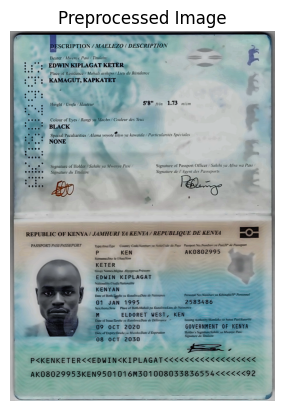

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(preprocessed_img, cmap='gray')  # Assuming preprocessed_img is grayscale
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np
from deskew import determine_skew
from PIL import Image
import io

def preprocess_for_ocr_optimised(image_path, denoise=True):
    """
    Preprocess an image in preparation for OCR.

    Steps:
        1. Convert to Grayscale
        2. Denoise (if denoise=True)
        3. Correct Skew
        4. Enhance Contrast / Sharpen
        5. Apply Threshold

    :param image: Input image in BGR format (as loaded by cv2).
    :param denoise: Whether to apply denoising or not.
    :return: Thresholded grayscale image ready for OCR.
    """
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Could not read image")

    # 1. Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 2. Denoise (Optional)
    if denoise:
        # Using fastNlMeansDenoising on grayscale is usually faster than color
        # If noise is minimal or images are clean, you can skip this step for speed
        gray = cv2.fastNlMeansDenoising(gray, None, h=10, templateWindowSize=7, searchWindowSize=21)

    # 3. Correct Skew
    angle = determine_skew(gray)
    if angle:
        (h, w) = gray.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        gray = cv2.warpAffine(gray, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    # 4. Contrast Enhancement / Sharpening
    # --- Option A: Contrast Limited Adaptive Histogram Equalization (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)

    # --- Option B: Sharpen using Unsharp Mask
    # Gaussian blur
    blurred = cv2.GaussianBlur(enhanced, (0, 0), 3)
    # AddWeighted for unsharp masking
    sharpened = cv2.addWeighted(enhanced, 1.5, blurred, -0.5, 0)

    #extra darken
    darkened = cv2.convertScaleAbs(sharpened, alpha=0.9, beta=0)
    return darkened

    # 5. Thresholding (Adaptive Threshold)
    # You can swap in Otsu's threshold if your images have uniform lighting:
    #   _, thresh = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
     # Apply thresholding (Otsu's method)
    binary = cv2.threshold(darkened, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    #(Adaptive Threshold)
    thresh = cv2.adaptiveThreshold(
        binary, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        11, 2
    )

    # Convert from NumPy (OpenCV) format to Pillow Image
    pil_img = Image.fromarray(thresh)

    # Save to an in-memory buffer with the desired DPI
    buffer = io.BytesIO()
    pil_img.save(buffer, format="PNG", dpi=(300, 300))
    buffer.seek(0)

    # Reload as NumPy array to preserve the DPI in the saved image
    pil_img_dpi = Image.open(buffer)
    np_img_dpi = np.array(pil_img_dpi)
    return np_img_dpi



In [ ]:
new_preprocess = preprocess_for_ocr_optimised(img_path)


In [ ]:
from google.colab import files
import cv2

# Assuming preprocessed_img is a NumPy array representing the image
cv2.imwrite('new_preprocess.png', new_preprocess)

files.download('new_preprocess.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

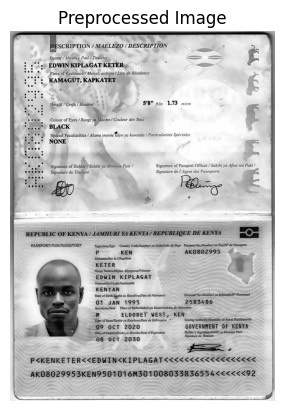

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(new_preprocess, cmap='gray')  # Assuming preprocessed_img is grayscale
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

In [ ]:
import pytesseract

In [ ]:
img = Image.open("/content/FahadIqbal.jpg") #// used to load the image



In [ ]:
result = pytesseract.image_to_string(preprocessed_img,lang = 'eng') # method to extract the text from loaded image
result

' \n\naura NEPAL\n\nwery Type {Te <$1/ Country Code ‘ara? 4/ Passport No\n\n   \n\nP NPL 11361613\n‘7 / Surname\n SUNAR\n_- / Given Names\nSUMAN\n| etem/ Navonality\nNEPALESE\nSAT MEY Date of Birth anatren 4/ Citrzenship No.\n05 OCT 1999 49-01-\n«Wy Sex TTT Place af Birth\nMYAGDI\nah Wiky Oote of Issue wat) 4 Peery /\n17 MAR 2019 MOFA, DEPARTMENT OF PASSPORT\ntre ext fiythy Date of Excury ‘res wH/ Holder\'s Signature\n_ 16 MAR 2029\nSy\n\nP<NPLSUNAR<<SUMAN<<<<<<<<<<<<<<<<<<<<<<<<<<<\n11361613<0ONPL9910056M290316149017503850<<<00\n\n- ———\n\nomy Rasliow,\n\nBROTHER\n\n—_\n=n @\n\nTT Allies\n\nKHIBANG, 04 DHAWALAGIRI, MYAGDI\n\nee) em ele ow 8 aT "Wie + sart/ Od Traeet Oocuirent Ne. with Date ani Mane of Tae\n\noer ¢/ Ref tie\n\n_ DPEO0056416\n\n \n\x0c'

In [ ]:
result1 = pytesseract.image_to_string(new_preprocess,lang = 'eng') # method to extract the text from loaded image
result1

"aart_ NEPAL .\nWey Type ‘ea/ Country Code ‘Geert 4/ Passport =\nareal P NPL 11361613\n\n \n\nPassport #/ Surname . '’\na/ Given Names\n_ SUMAN\n‘diyem/ Nationality\nNEPALESE t a\n=a ftRy Date of Birth Srutcrar 4/ Citizenship No.\n05 OCT 1999 ; 49-01-\niy / Sex TMT Place of Birth\neS MYAGDI\n~ aif) (hy Date of Issue nth 0 free / Authority\n17 MAR 2019 MOPA, DEPARTMENT OF PASSPORT\ncare sifeit fulty Date of Expiry iret wti/ Holder's Signature\n16 MAR 2029\n\n \n\nSy\n\nP<NPLSUNAR<<SUMAN<<<<<<<<<<<<<<<<<<<<<<<<<<<\n113616135<0ONPL9910056M290316149017503850<<<00\n\n~ i ee wy\n\nKHIBANG, 04 DHAWALAGIRI, MYAGDI\n\nrh en ete WOR STs Tis « sant) Old Travel Derwent Ne with Debe ani! Miane at Basie\n\n#21 4/ Ref No.\n\nPEQOO56416\n\n \n\x0c"

In [ ]:
# Perform OCR on the image
results = reader.readtext(preprocessed_img, detail=0)
results

['NEPAL',
 'Typc',
 'IT',
 'County Code',
 'TT 4/ Passdort No',
 'Taati /',
 'P',
 'NPL',
 '11361613',
 'Passport',
 '7/',
 'Sumame',
 'SUNAR',
 'ml Glven Nomes',
 'SUMAN',
 'rzam NaUon_lily',
 'NEPALESE',
 'MEV Date 0f Birth',
 'nulam V @mzensnip No',
 '05 OCT 1999',
 '49-01-75-03850',
 '55',
 'TT/ Place 0( Blh',
 'M',
 'MYAGDI',
 'Fili',
 'Wv OJtt of [ssue',
 'n Wtt',
 'Authority',
 '17 MAR 2019',
 'MOFA,',
 'DEPAr  ulng :',
 'Of PaSSDORT',
 '"t hwl Date ol Exoly',
 'Holder $ Signulurnt',
 '16 MAR 2029',
 '2"',
 'P<NPLSUNAR<<SUhAN<<<<<<<<<<<<<<<<<<<<<<<<<<<',
 '11361613<ONPL9910056m290316149017503850<<<00',
 'Mal',
 'RAJU SUNAR',
 'Aalltn',
 'BROTHER',
 '7M7 A',
 'KHIBANG, 04 DHAWALAGIRI, MYAGDI',
 'TI 0o',
 'Delrcru *c',
 '0nf ai',
 'ncl',
 'DPE00056416',
 'Ta',
 '5I',
 'Trtl']

In [ ]:
# Perform OCR using PaddleOCR
ocr_results = ocr.ocr(new_preprocess)

# Fix encoding issues in the OCR results
extracted_text = " ".join([line[1][0] for line in ocr_results[0]])
extracted_text = ftfy.fix_text(extracted_text)
extracted_text = ftfy.fix_encoding(extracted_text)

# Process the extracted text
lines = extracted_text.split('\n')
text1 = [line.strip() for line in lines if line.strip()]
print(text1)

[2024/12/26 08:37:06] ppocr DEBUG: dt_boxes num : 43, elapsed : 0.22038602828979492
[2024/12/26 08:37:06] ppocr DEBUG: cls num  : 43, elapsed : 0.11537981033325195
[2024/12/26 08:37:10] ppocr DEBUG: rec_res num  : 43, elapsed : 3.8623971939086914
["NEPAL REGIT /Type Country Code Passport No. P NPL 11361613 Passport /Suname SUNAR Glven Names SUMAN m/Natonallty NEPALESE Date of Birth a/ Citizenshlp No. 050CT1999 49-01-75-03850 /5x Place af Birth M MYAGDI  Date of Issue frr/Issulng Authority 17MAR2019 MOFA,DEPARTMENT OFPASSPORT  Date of Epiry /Halder's Signature 16MAR2029 QM PNPLSUNAR<<SUMAN<<<<<<<<<<<<<<<<<<<<<< 11361613<0NPL9910056M290316149017503850<<<00 N RAJU SUNAR meaallip BROTHER ymAdde KHIBANG,04 DHAWALAGIRI,MYAGDI dTr DcnDe n 1/Re DPE00056416 3"]


In [ ]:
["NEPAL Type  Country Code /Passport No P NPL 11361613 Passport /Sumame SUNAR /Glven Names SUMAN m/Natonally NEPALESE Date of Brth /Czenshp No 050CT 1999 49-01-75-03850 /5x Place af Birth M MYAGDI Dceof Issue  fr/Issulng Authority 17MAR2019 MOFA,DEPARTMENT OF PASSPORT   Date of Exiry t  Halder's Signatu 16MAR2029 PNPLSUNAR<SUMAN<<<<<<<<<<<<<<<<<<<<<<<<< 11361613<0NPL9910056M290316149017503850<<<00 ak RAJU SUNAR yslap BROTHER /Add KHIBANG,04 DHAWALAGIRI,MYAGDI d Tr DcD n 1/Ref DPE00056416"]
["NEPAL REGIT /Type Country Code Passport No. P NPL 11361613 Passport /Suname SUNAR Glven Names SUMAN m/Natonallty NEPALESE Date of Birth a/ Citizenshlp No. 050CT1999 49-01-75-03850 /5x Place af Birth M MYAGDI  Date of Issue frr/Issulng Authority 17MAR2019 MOFA,DEPARTMENT OFPASSPORT  Date of Epiry /Halder's Signature 16MAR2029 QM PNPLSUNAR<<SUMAN<<<<<<<<<<<<<<<<<<<<<< 11361613<0NPL9910056M290316149017503850<<<00 N RAJU SUNAR meaallip BROTHER ymAdde KHIBANG,04 DHAWALAGIRI,MYAGDI dTr DcnDe n 1/Re DPE00056416 3"]




In [ ]:







# Define regex patterns to extract specific details
patterns = {
    "License No": r"License No\.*\s*(\d+)",
    "Name": r"Name\s*([a-zA-Z\s]+)",
    "Nationality": r"Nationality\s*([a-zA-Z]+)",
    "Date of Birth": r"Date of Birth\s*(\d{2}-\d{2}-\d{4})",
    "Issue Date": r"Issue Date\s*(\d{2}-\d{2}-\d{4})",
    "Expiry Date": r"Expiry Date\s*(\d{2}-\d{2}-\d{4})",
    "Place of Issue": r"Place of Issue\s*([a-zA-Z]+)"
}

# Extract details based on patterns
data = {}
for key, pattern in patterns.items():
    match = re.search(pattern, extracted_text)
    data[key] = match.group(1) if match else None

# Print extracted details
print("\nExtracted Details:")
for key, value in data.items():
    print(f"{key}: {value}")



Extracted License Information:
------------------------------
{}
